<a href="https://colab.research.google.com/github/HAgarOsman2002/Deep-learning-projects/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
# Add convolutions and max pooling
                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                    tf.keras.layers.MaxPooling2D(2, 2),
                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                    tf.keras.layers.MaxPooling2D(2,2),

                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dense(10, activation='softmax')
                    ])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4940 - accuracy: 0.8258
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3741 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3361 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3120 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2949 - accuracy: 0.8910

MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8707


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]
1/1 [==============================] - 0s 23ms/step


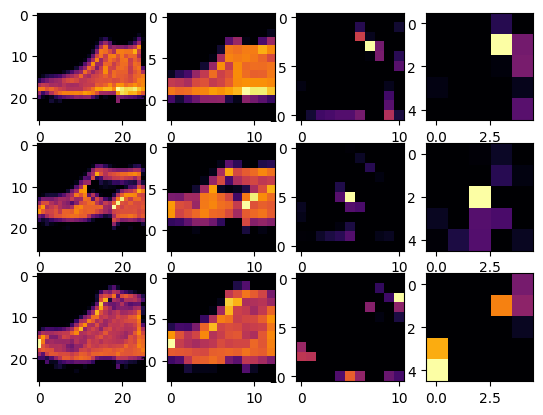

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

print(test_labels[:100])

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=0.01)

# Train the model with the EarlyStopping callback
model.fit(training_images.reshape((-1, 28, 28, 1)), training_labels, epochs=50, callbacks=[early_stopping])

# Evaluate on the test set
model.evaluate(test_images.reshape((-1, 28, 28, 1)), test_labels)

---

In [ ]:
from scipy.datasets import ascent

# load the ascent image
ascent_image = ascent()

In [ ]:
import numpy as np

# Copy image to a numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

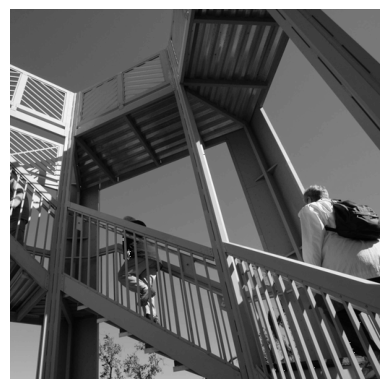

In [ ]:
import matplotlib.pyplot as plt

# Visualize the image
plt.axis('off')
plt.gray()
plt.imshow(ascent_image)
plt.show()

In [ ]:
# Experiment with different values and see the effect
# filter = [ [0, 1, 0], [1,-4,1 ], [0, 1, 0]]
weight = 1

# filter = [ [1, 1, 1], [-1, -3, -1], [1, 1, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

filter = [ [0, 1, 0],[0, 1, 0],[0, 1, 0] ]

# filter = [ [0, 2, 0],[0, -3, 0],[0, 2, 0] ]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# So, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them


In [ ]:
# rb.gy/b7voz9

# Iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
      convolution = convolution + (ascent_image[x, y] * filter[1][1])
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])

      # Multiply by weight
      convolution = convolution * weight

      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[x, y] = convolution

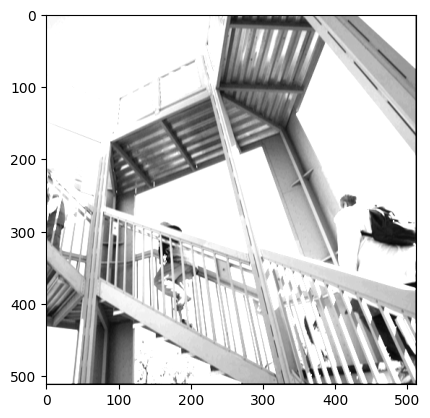

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.imshow(image_transformed)

plt.show()

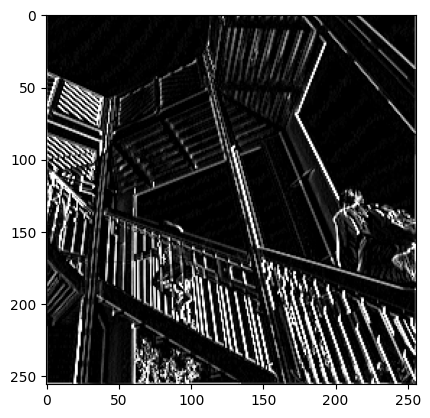

In [ ]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):

    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()